### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('coupons.csv')

In [ ]:
data.head()

2. Investigate the dataset for missing or problematic data.

In [6]:
#General info
data.info()

# Count missing data
missing_count = data.isnull().sum()
print('')
print('\t\tmissing_count')
print(missing_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

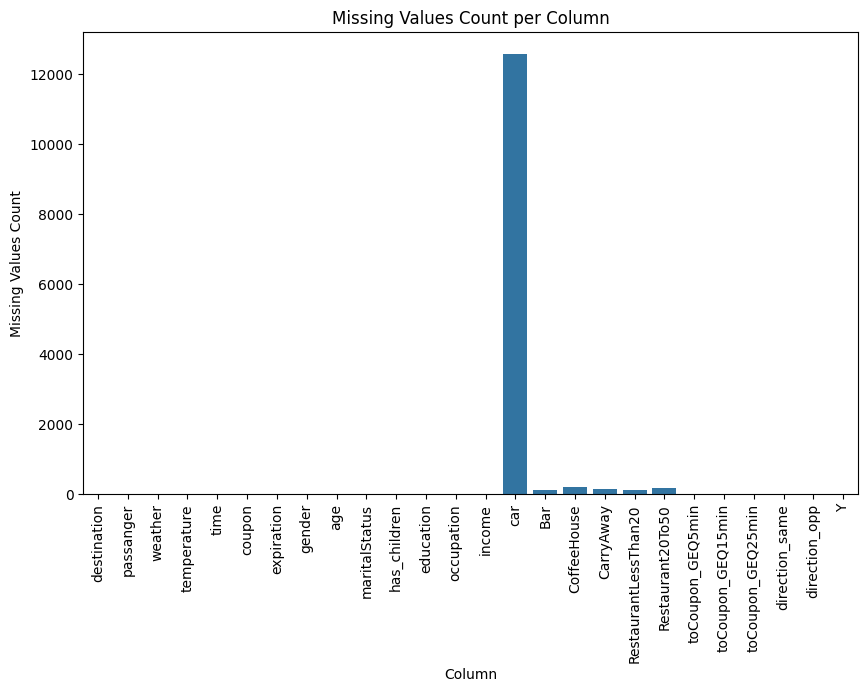

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_count.index, y=missing_count.values)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Count per Column')
plt.show()


More null values are in the Car column, this column will be removed from the dataset.

In [ ]:
# Drop the car column
data.drop('car',axis=1, inplace=True)

4. What proportion of the total observations chose to accept the coupon?



Accepted in terms of proportion = 56.84326710816777%


Text(0, 0.5, 'Count')

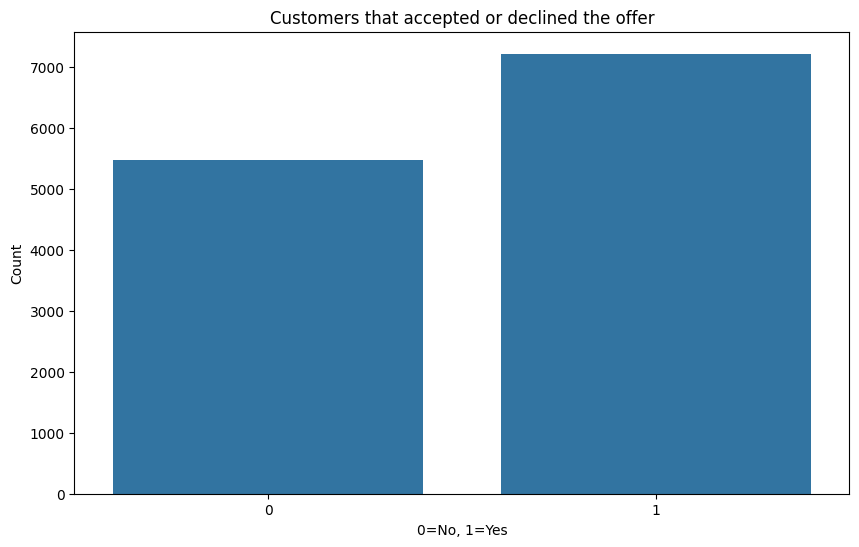

In [8]:
accepted = data['Y']
accepted_rate = accepted.mean()
print('Accepted in terms of proportion = ' + str(accepted_rate * 100) +'%')


# Number of observations that accepted and not accepted
plt.figure(figsize=(10, 6))
sns.countplot(data,x='Y')

plt.title('Customers that accepted or declined the offer')
plt.xlabel('0=No, 1=Yes')
plt.ylabel('Count')

Accepted in terms of percentage = 58.148567729406054%

5. Use a bar plot to visualize the `coupon` column.

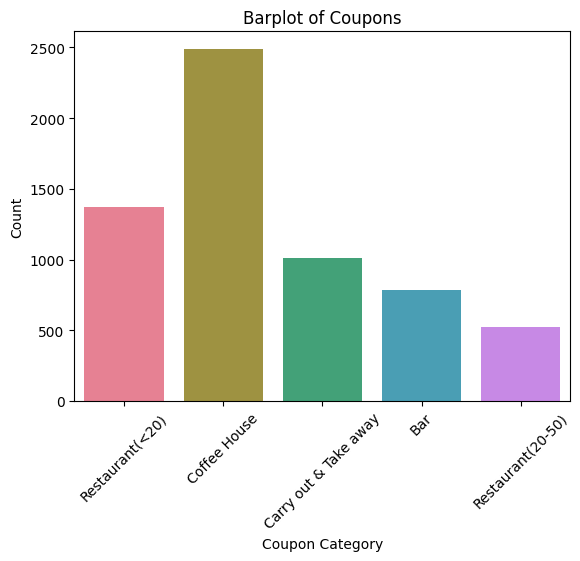

In [ ]:
palette = sns.color_palette("husl", len(data['coupon'].unique()))
sns.countplot(data=data, x='coupon', hue='coupon', palette=palette).set(title='Barplot of Coupons')
plt.xlabel('Coupon Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

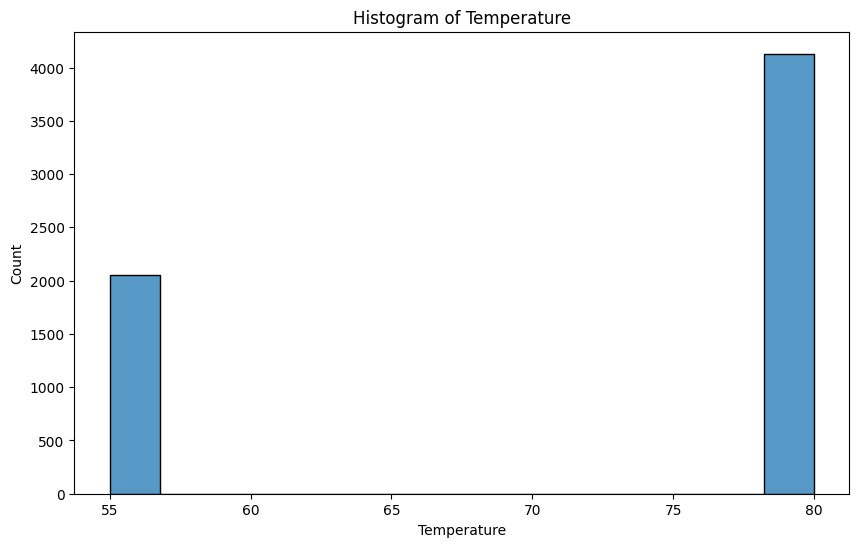

In [ ]:
# Histogram plot of temperature column
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='temperature').set(title='Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
Data_bar = data.query("coupon == 'Bar'")
print(len(Data_bar))

786


2. What proportion of bar coupons were accepted?


In [ ]:
accepted = Data_bar['Y']
accepted_rate = accepted.mean()
print('Bar data accepted in terms of proportion = ' + str(accepted_rate * 100) +'%')

px.pie(data_frame=Data_bar, names='Y', title='Pie chart of total coupons vs total accepted coupons' )

Bar data accepted in terms of proportion = 45.80152671755725%


Bar data accepted in terms of proportion = 45.80152671755725%

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


0.4056047197640118 0.8125


Text(0.5, 1.0, 'Count of coupon accepted drivers by bar visit frquency')

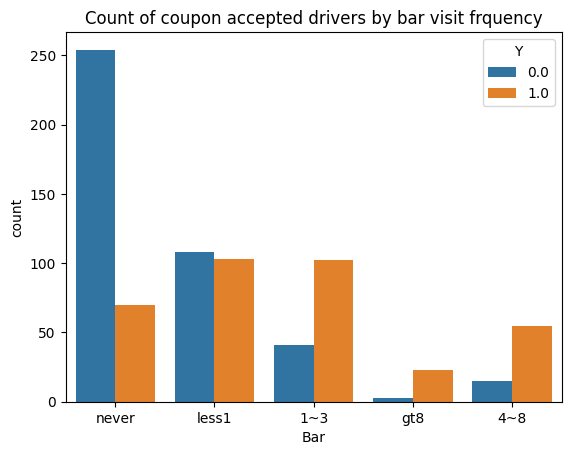

In [ ]:
three_plus_data = Data_bar.query('(Bar=="4~8" or Bar=="gt8")')
below_three_data = Data_bar.query('(Bar=="1~3" or Bar=="never" or Bar=="less1")')
three_plus_accepted = three_plus_data['Y'].mean()
below_phree_accepted = below_three_data['Y'].mean()
print(below_phree_accepted, three_plus_accepted)
sns.countplot(data=Data_bar, x='Bar', hue='Y')
plt.title('Count of coupon accepted drivers by bar visit frquency')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate of 25 and above going to bar more than once vs all others 33.44%


Text(0.5, 1.0, 'Pie Chart of various audiences who accepted Coupons')

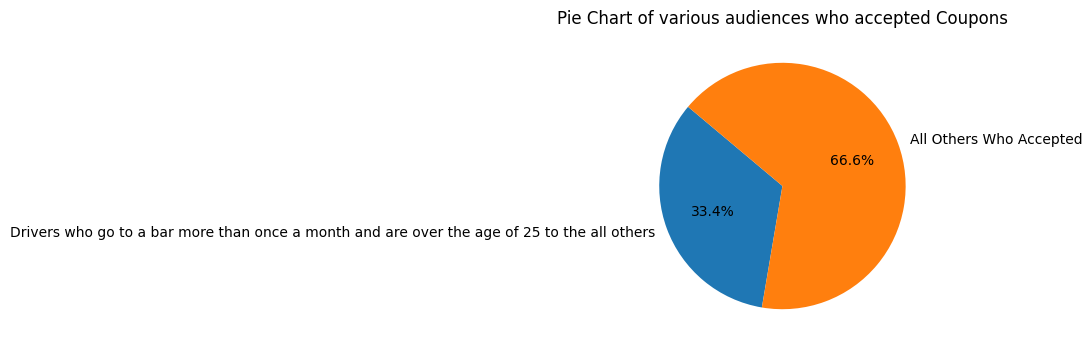

In [ ]:
total_count = len(Data_bar)
total_accepted_count = len(Data_bar[Data_bar['Y']==1])
labels = [total_count, total_accepted_count]

Data_bar['age'] = Data_bar['age'].astype(int)

# customers who accepted, and who are more than 25 plus those who go more than once
Data_bar['multi25'] = ((Data_bar['Y']==1) &
                      (Data_bar['age']>25) &
                    ( (Data_bar['Bar']=='1~3') |
                      (Data_bar['Bar']=='4~8') |
                      (Data_bar['Bar']=='gt8')
                    )
                     )

multi25Count = Data_bar['multi25'].sum()

ratio = multi25Count/total_accepted_count *100
all_other = 100-ratio
print("Acceptance rate of 25 and above going to bar more than once " + "vs all others " + str(round(ratio, 2))+'%')
categories = ['Drivers who go to a bar more than once a month and are over the age of 25 to the all others', 'All Others Who Accepted']
percentages = [ratio, all_other]
plt.figure(figsize=(4, 4))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of various audiences who accepted Coupons')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Ratio of above criteria drivers who accepted to total accepted bar coupons is: 49.2%


Text(0.5, 1.0, 'Pie Chart of audiences who accepted Coupons')

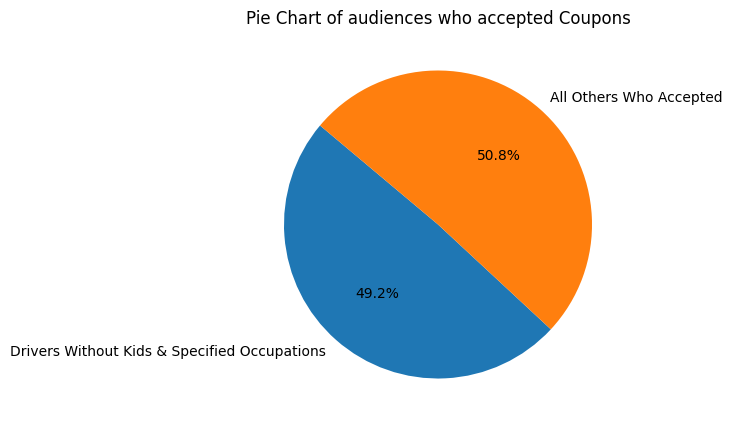

In [ ]:
frequent = ['1~3', '4~8', 'gt8']

drivers = Data_bar.query("Y==1 and Bar in @frequent and occupation!='Farming Fishing & Forestry' and passanger != 'Kid(s)'")

req_cat_accepted = (len(drivers)/total_accepted_count) *100
all_others = 100 - req_cat_accepted

print("Ratio of above criteria drivers who accepted to total accepted bar coupons is: " + str(round(req_cat_accepted, 2)) + '%')

categories = ['Drivers Without Kids & Specified Occupations', 'All Others Who Accepted']
percentages = [req_cat_accepted, all_others]
plt.figure(figsize=(5, 5))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of audiences who accepted Coupons')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Percentage category 1 drivers who accepted the coupon is 49.2%


Text(0.5, 1.0, 'Pie Chart of various audiences who accepted Coupons')

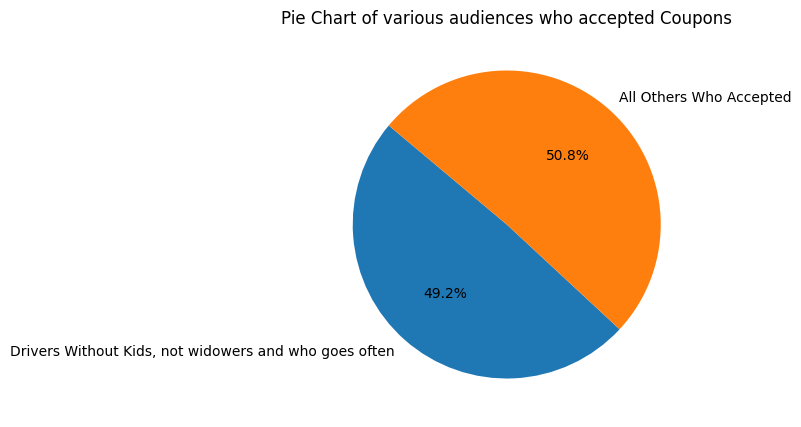

In [ ]:
passengers1 = Data_bar.query("Y==1 and Bar in @frequent and passanger !='Kid(s)' and maritalStatus != 'Widowed'")
pass1Count = len(passengers1)
cat1Ratio = round(pass1Count/total_accepted_count, 4)*100
print("Percentage category 1 drivers who accepted the coupon is "+str(cat1Ratio)+"%")

categories = ['Drivers Without Kids, not widowers and who goes often', 'All Others Who Accepted']
percentages = [cat1Ratio, 100-cat1Ratio]
plt.figure(figsize=(5, 5))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of various audiences who accepted Coupons')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Based on the observations,the passengers who accepted the bar coupons were not widowed and are likely to go to the bar if they are passengers under 30 and do not have kids.
They typically male.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<Axes: xlabel='destination', ylabel='count'>

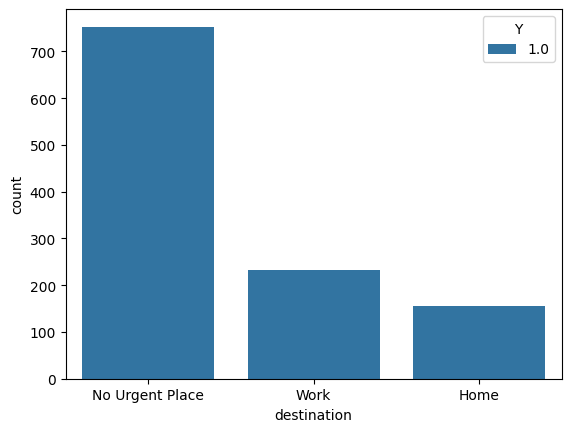

In [ ]:
#check coupon accepted was for a coffee house and the destination
coffee_coupon = data.query('(coupon == "Coffee House") and (Y ==1)')
sns.countplot(data=coffee_coupon, x='destination', hue='Y')


We can see that most people redeemed their coupon when there was no urgent place to go.

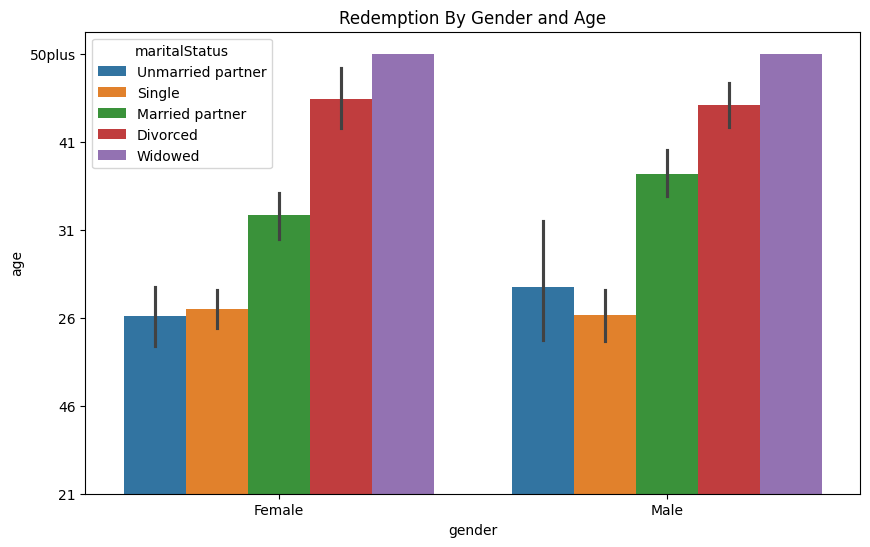

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=coffee_coupon, x="gender", y="age", hue="maritalStatus")
plt.title("Redemption By Gender and Age")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
px.histogram(coffee_coupon, x="occupation", title="Redepmption By Gender and Occupation", color="gender")